In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import numpy as np
import glob
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
face_cascade = cv2.CascadeClassifier('/Users/jack_wu/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/jack_wu/opencv/data/haarcascades/haarcascade_eye.xml')

def image_augument(item_Num, age, gender): #item_Num = count
	s_jpg='.jpg'
	input_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/FinalProject_dataset/child/male/"
	#input_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/FinalProject_dataset/"+age+'/'+gender+'/'
	#output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/"+age+'/'+gender+'/'
	output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/"
	count = 0
	for file_count in range(item_Num):
		i = 0
		s_file_count = str(file_count)
		img = cv2.imread(input_address + s_file_count + s_jpg)
		x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
		x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
		for batch in datagen.flow(x, batch_size=1, save_to_dir=output_address, save_format='jpg'):
			i += 1
			count +=1
			if i > 10:
				break  # otherwise the generator would loop indefinitely
	return count

def initial_face(item_Num, age, gender):
	s_jpg='.jpg'
	count = 0
	All_jpg=glob.glob('/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/'+age+'/'+gender+'/'+'*.jpg')
	#All_jpg=glob.glob('/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Test_dataset/'+age+'/'+gender+'/'+'*.jpg')
	output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"+age+'/'+gender+'/'
	#output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Test_facedetection/"+age+'/'+gender+'/'
	#for file_count in range(item_Num):
	for jpg in All_jpg:
		img = cv2.imread(jpg)
		faces = face_cascade.detectMultiScale(img, 1.3, 5)
		if (len(faces)!=0):
			for (x,y,w,h) in faces:
				gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
				cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
				roi_gray = gray[y:y+h, x:x+w]
				resize_face=cv2.resize(roi_gray,(30,30),interpolation=cv2.INTER_AREA)
				cv2.imwrite(output_address+str(count)+s_jpg, resize_face, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
				count = count + 1
		else:
			## No face detect
			pass
	return count

Using TensorFlow backend.


In [2]:
####################### image augument #############################

# num_image = image_augument(1210,'adult','female')
# num_eff_facedetection = initial_face(num_image,'adult','female')
# print ("adult female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(1588,'adult','male')
# num_eff_facedetection = initial_face(num_image,'adult','male')
# print ("adult male num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(774,'child','female')
# num_eff_facedetection = initial_face(num_image,'child','female')
# print ("child female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(650,'child','male')
# num_eff_facedetection = initial_face(num_image,'child','male')
# print ("child male num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(452,'elder','female')
# num_eff_facedetection = initial_face(num_image,'elder','female')
# print ("elder female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(878,'elder','male')
# num_eff_facedetection = initial_face(num_image,'elder','male')
# print ("elder male num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(1002,'young','female')
# num_eff_facedetection = initial_face(num_image,'young','female')
# print ("young female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(830,'young','male')
# num_eff_facedetection = initial_face(num_image,'young','male')
# print ("young male num_eff_facedetection",num_eff_facedetection)



In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import cv2
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras import backend as K
from numpy import genfromtxt
import matplotlib.pyplot as plt

def img2csv (num_eff_facedetection, age, gender):
	bmpfile=glob.glob("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"+age+'/'+gender+'/'+'*.jpg')
	X_train = np.zeros((num_eff_facedetection,30,30))
	count = 0
	for bmp_dir in bmpfile:
		img = cv2.imread(bmp_dir,0)
		img = np.array(img)
		X_train[count,:,:] = img[:,:]
		count += 1
	return X_train

def train_and_evaluate_model(model, data_train, labels_train, data_test, labels_test):
	history = model.fit(data_train, labels_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(data_test, labels_test))
	# list all data in history
	print(history.history.keys())

	# summarize history for accuracy
	plt.plot(history.history['acc'])
	plt.plot(history.history['val_acc'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()
	# 	score = model.evaluate(data_test, labels_test, verbose=0)
# 	print('Test loss:', score[0])
# 	print('Test accuracy:', score[1])
	
def create_model():
	model = Sequential()
	model.add(Conv2D(64, kernel_size=(7, 7),
					 activation='relu',
					 input_shape=input_shape))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (5, 5), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(64, activation='relu'))
	#model.add(Dropout(0.5))
	model.add(Dense(8))
	model.add(Dense(num_classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy',
				  optimizer='Adadelta',
				  metrics=['accuracy'])
	return model
    # create your model using this function

X_train_0 = img2csv(2685,'adult','female')
X_train_1 = img2csv(2572,'adult','male')
X_train_2 = img2csv(1839,'child','female')
X_train_3 = img2csv(1542,'child','male')
X_train_4 = img2csv(1102,'elder','female')
X_train_5 = img2csv(1427,'elder','male')
X_train_6 = img2csv(2066,'young','female')
X_train_7 = img2csv(1872,'young','male')
X_train = np.concatenate((X_train_0, X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6, X_train_7),axis = 0)
Y_train = np.concatenate((np.zeros(2685),np.ones(2572),2*np.ones(1839),3*np.ones(1542),4*np.ones(1102),5*np.ones(1427),6*np.ones(2066),7*np.ones(1872)),axis = 0)
Y_train = np_utils.to_categorical(Y_train, num_classes=8)

batch_size = 64
num_classes = 8
epochs = 40
img_rows, img_cols = 30, 30
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print (X_train.shape)
print (Y_train.shape)



(15105, 30, 30, 1)
(15105, 8)


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Running Fold 1 / 5
Train on 12080 samples, validate on 3025 samples
Epoch 1/40
12080/12080 [==============================] - 31s - loss: 2.1999 - acc: 0.1542 - val_loss: 2.0462 - val_acc: 0.1788
Epoch 2/40
12080/12080 [==============================] - 34s - loss: 2.0508 - acc: 0.1854 - val_loss: 2.0056 - val_acc: 0.2089
Epoch 3/40
12080/12080 [==============================] - 50s - loss: 1.9981 - acc: 0.2196 - val_loss: 1.9804 - val_acc: 0.2555
Epoch 4/40
12080/12080 [==============================] - 49s - loss: 1.9229 - acc: 0.2551 - val_loss: 1.8593 - val_acc: 0.2969
Epoch 5/40
12080/12080 [==============================] - 49s - loss: 1.8578 - acc: 0.2859 - val_loss: 1.8245 - val_acc: 0.2995
Epoch 6/40
12080/12080 [==============================] - 49s - loss: 1.8010 - acc: 0.2976 - val_loss: 1.7651 - val_acc: 0.2985
Epoch 7/40
12080/12080 [==============================] - 49s - loss: 1.7381 - acc: 0.3195 - val_loss: 1.6967 - val_acc: 0.3425
Epoch 8/40
12080/12080 [============

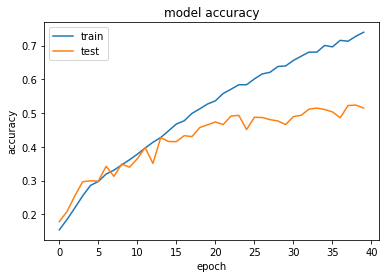

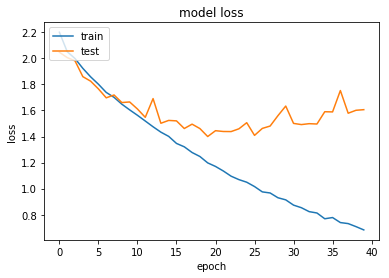

Test loss: 1.6059547844
Test accuracy: 1.6059547844
Test loss: 1.6059547844
Test accuracy: 0.515041322452


In [4]:
from sklearn.cross_validation import StratifiedKFold
n_folds = 5
lables = np.concatenate((np.zeros(2685),np.ones(2572),2*np.ones(1839),3*np.ones(1542),4*np.ones(1102),5*np.ones(1427),6*np.ones(2066),7*np.ones(1872)),axis = 0)
skf = StratifiedKFold(lables, n_folds=n_folds, shuffle=True)

ave_loss = []
ave_accuracy = []
for i, (train, test) in enumerate(skf):
	if i==1:
		break
	print ("Running Fold", i+1, "/", n_folds)
	model = None # Clearing the NN.
	model = create_model()
	train_and_evaluate_model(model, X_train[train], Y_train[train], X_train[test], Y_train[test])
	score = model.evaluate(X_train[test], Y_train[test], verbose=0)
	ave_loss.append(score[0])
	ave_accuracy.append(score[1])
	print ('Test loss:',score[0])
	print ('Test accuracy:',score[0])
print('Test loss:', np.mean(ave_loss))
print('Test accuracy:', np.mean(ave_accuracy))

In [5]:
# from keras.utils import np_utils
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
# from keras.optimizers import Adam
# from keras import backend as K
# from numpy import genfromtxt

# Y_train = np_utils.to_categorical(Y_train, num_classes=8)

# batch_size = 64
# num_classes = 8
# epochs = 100
# img_rows, img_cols = 30, 30

# if K.image_data_format() == 'channels_first':
#     X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#     #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#     #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# model = Sequential()
# model.add(Conv2D(64, kernel_size=(7, 7),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(8))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy',
#               optimizer='Adadelta',
#               metrics=['accuracy'])

# # model.fit(X_train, Y_train,
# #           batch_size=batch_size,
# #           epochs=epochs,
# #           verbose=1,
# #           validation_data=(X_train, Y_train))

# import matplotlib.pyplot as plt

# history = model.fit(X_train, Y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(X_train, Y_train))
# # list all data in history
# print(history.history.keys())

# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()


In [6]:
# from sklearn.cross_validation import StratifiedKFold

# # Cross Validation

# n_folds = 5

# #data, labels, header_info = load_data()
# lables = np.concatenate((np.zeros(2685),np.ones(2572),2*np.ones(1839),3*np.ones(1542),4*np.ones(1102),5*np.ones(1427),6*np.ones(2066),7*np.ones(1872)),axis = 0)
# skf = StratifiedKFold(lables, n_folds=n_folds, shuffle=True)
# Y_train = np_utils.to_categorical(lables, num_classes=8)
# for i, (train, test) in enumerate(skf):
# 	print ("Running Fold", i+1, "/", n_folds)
# 	score = model.evaluate(X_train[test], Y_train[test], verbose=0)
# 	print('Test loss:', score[0])
# 	print('Test accuracy:', score[1])

In [7]:
### another testing data set ######

# num_eff_facedetection = initial_face(22,'adult','female')
# print ("adult female num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(22,'adult','male')
# print ("adult male num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(24,'child','female')
# print ("child female num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(25,'child','male')
# print ("child male num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(26,'elder','female')
# print ("elder female num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(23,'elder','male')
# print ("elder male num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(26,'young','female')
# print ("young female num_eff_facedetection",num_eff_facedetection)

# num_eff_facedetection = initial_face(23,'young','male')
# print ("young male num_eff_facedetection",num_eff_facedetection)

def img2csv (num_eff_facedetection, age, gender):
	bmpfile=glob.glob("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Test_facedetection/"+age+'/'+gender+'/'+'*.jpg')
	X_train = np.zeros((num_eff_facedetection,30,30))
	count = 0
	for bmp_dir in bmpfile:
		img = cv2.imread(bmp_dir,0)
		img = np.array(img)
		X_train[count,:,:] = img[:,:]
		count += 1
	return X_train

X_test_0 = img2csv(20,'adult','female')
X_test_1 = img2csv(19,'adult','male')
X_test_2 = img2csv(17,'child','female')
X_test_3 = img2csv(20,'child','male')
X_test_4 = img2csv(21,'elder','female')
X_test_5 = img2csv(15,'elder','male')
X_test_6 = img2csv(22,'young','female')
X_test_7 = img2csv(18,'young','male')
X_test = np.concatenate((X_test_0, X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6, X_test_7),axis = 0)
Y_test = np.concatenate((np.zeros(20),np.ones(19),2*np.ones(17),3*np.ones(20),4*np.ones(21),5*np.ones(15),6*np.ones(22),7*np.ones(18)),axis = 0)
Y_test = np_utils.to_categorical(Y_test, num_classes=8)

print (X_test.shape)
print (Y_test.shape)

# ans_img = np.array(7)
# ans_img = np_utils.to_categorical(ans_img, num_classes=8)

if K.image_data_format() == 'channels_first':
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(152, 30, 30)
(152, 8)
Test loss: 2.09069501726
Test accuracy: 0.453947368421
